## Investment Assignment
### Objective
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

### Constraints
Spark Funds has two minor constraints for investments:

    1.It wants to invest between 5 to 15 million USD per round of investment

    2.It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

For your analysis, consider a country to be English speaking only if English is one of the official languages in that country

###  Data Analysis Suggested
<b>Investment type analysis:</b> Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
<br><b>Country analysis:</b> Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
<br><b>Sector analysis:</b> Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

In [1]:
#using jupyter magic command to change the current working directory.

%cd "C:\Users\vshivara\Downloads\ML_EPGP\Investment"

C:\Users\vshivara\Downloads\ML_EPGP\Investment


### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Know the encoding of each file

In [3]:
with open("Input_Data/companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(50000))

print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [4]:
with open("Input_Data/rounds2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
with open("Input_Data/mapping.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


### Checkpoint 1: File Operations and Data Cleaning

In [7]:
companies=pd.read_csv("Input_Data/companies.csv", encoding="unicode_escape")
rounds2=pd.read_csv("Input_Data/rounds2.csv", encoding="ISO-8859-1")
mapping=pd.read_csv("Input_Data/mapping.csv", encoding="ascii")

In [8]:
companies['permalink']=companies.permalink.apply(lambda x: x.lower())
rounds2['company_permalink']=rounds2.company_permalink.apply(lambda x: x.lower())

In [9]:
companies.shape, rounds2.shape

((66368, 10), (114949, 6))

In [10]:
companies.permalink.nunique(), rounds2.company_permalink.nunique()

(66368, 66370)

In [11]:
set1 = set(companies['permalink'].values)
set2 = set(rounds2['company_permalink'].values)
common = set1.intersection(set2)
uncommon = set1.symmetric_difference(set2)

In [12]:
len(common), len(uncommon)

(66363, 12)

#### Check for unique column in Companies

In [13]:
companies.name.nunique(), companies.permalink.nunique()

(66099, 66368)

#### Merging Company and rounds2

In [14]:
master_frame=pd.merge(companies, rounds2, how="inner", left_on="permalink", right_on="company_permalink")
master_frame.shape

(114942, 16)

In [15]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [16]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [17]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/random42,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [18]:
# Nan values for every column in Companies dataset
companies.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [19]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [20]:
# Nan values for every column in rounds2 dataset
rounds2.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### Checkpoint 2: Funding Analysis

Lets see how the investment is spread across

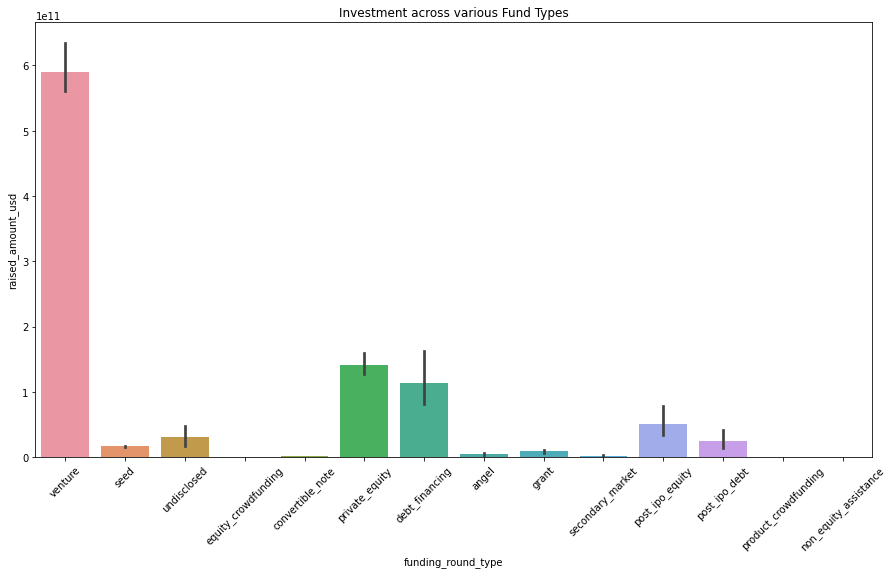

In [21]:
plt.figure(figsize = (15,8))
plt.title('Investment across various Fund Types')
sns.barplot(x='funding_round_type', y="raised_amount_usd", data=master_frame, estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

Since, spark funding is only interested in these 4 types (seed, angel, venture, spark equity), we will filter the rest

In [22]:
master_frame=master_frame[master_frame.funding_round_type.isin(['seed','angel','venture','private_equity'])]
master_frame.shape

(94390, 16)

In [23]:
# Check for no of null values for the raisedamount_usd
master_frame.raised_amount_usd.isnull().sum()

13764

In [24]:
# lets see the same in percentage of entire data size
master_frame.raised_amount_usd.isnull().sum()/master_frame.shape[0]

0.14582053183599958

In [25]:
# Since, it constitutes 14.6 percentage of data. Imputing this column, we might end up with wrong analysis.
master_frame.dropna(subset=["raised_amount_usd"], inplace=True)
master_frame.shape

(80626, 16)

In [26]:
master_frame.raised_amount_usd.describe()

count    8.062600e+04
mean     9.348091e+06
std      7.562986e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.976016e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

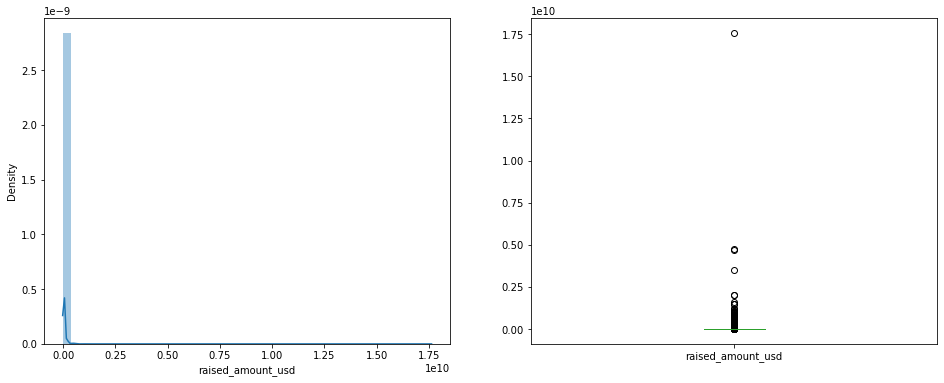

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(master_frame['raised_amount_usd']);

plt.subplot(122)
master_frame['raised_amount_usd'].plot.box(figsize=(16,6))

plt.show()

In [28]:
for funding_type in ['seed','angel','venture','private_equity']:
    print('Funding Type:', funding_type)
    print("Mean:", master_frame[master_frame.funding_round_type==funding_type]['raised_amount_usd'].mean())
    print("Median:", master_frame[master_frame.funding_round_type==funding_type]['raised_amount_usd'].median(),"\n")

Funding Type: seed
Mean: 719779.6202016778
Median: 275000.0 

Funding Type: angel
Mean: 958694.4697530865
Median: 400000.0 

Funding Type: venture
Mean: 11748949.129489528
Median: 5000000.0 

Funding Type: private_equity
Mean: 73308593.02944215
Median: 20000000.0 



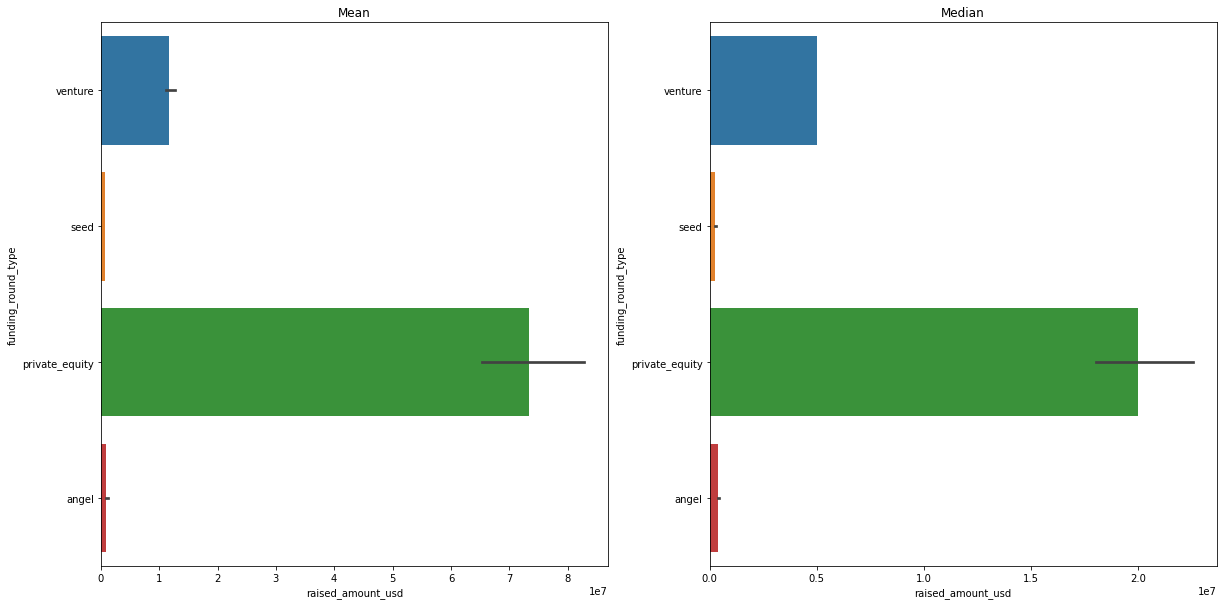

In [29]:
f,(ax1,ax2)=plt.subplots(1,2, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Mean')
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.mean)
plt.subplot(1, 2, 2)
plt.title('Median')
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

By all statistics measure we can see, venture is the right funding type# 

###  Checkpoint 3: Country Analysis

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

In [30]:
master_frame=master_frame[master_frame.funding_round_type=='venture']
master_frame.shape

(50228, 16)

top 9 countries where most funds are received

In [31]:
top9 = master_frame.groupby("country_code")['raised_amount_usd'].sum().sort_values(ascending = False).reset_index().head(9)
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


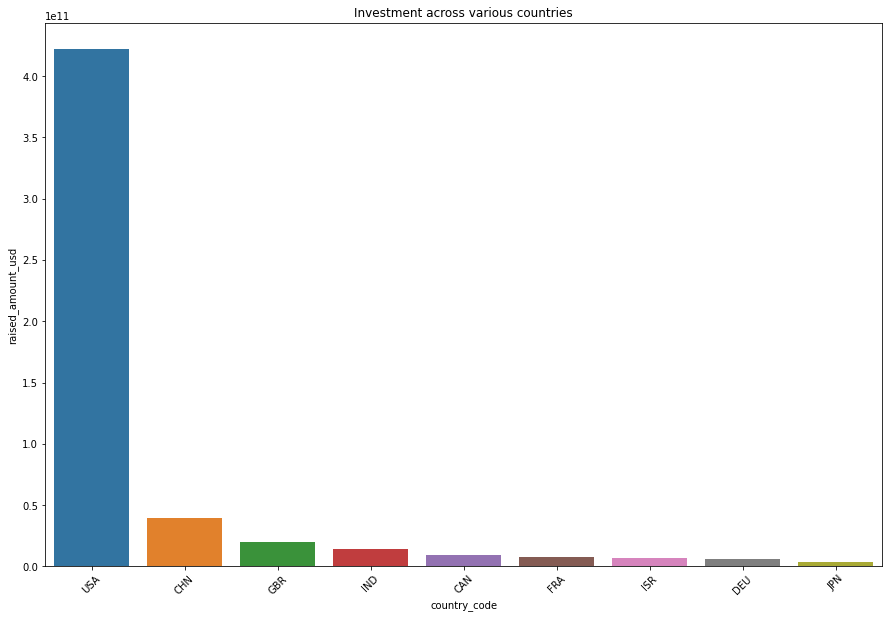

In [32]:
plt.figure(figsize = (15,10))
plt.title('Investment across various countries')
sns.barplot(x='country_code', y="raised_amount_usd", data=top9, estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

Amoung the top 9 countries, we can consider USA, GBR, IND as English speaking countries based on there english adaptation to the daily work life. Also as per wikipedia offical english speaking countries list.

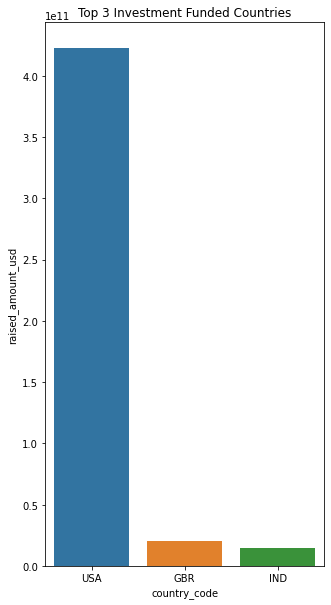

In [33]:
plt.figure(figsize = (5,10))
plt.title('Top 3 Investment Funded Countries')
sns.barplot(x='country_code', y="raised_amount_usd", data=top9[top9.country_code.isin(['USA','GBR','IND'])], estimator=np.sum)
plt.show()

### Checkpoint 4: Sector Analysis 1

Extract the primary sector of each category list from the category_list column

In [34]:
master_frame.dropna(subset=["category_list"], inplace=True)
master_frame.reset_index(inplace=True, drop=True)
master_frame.shape

(49726, 16)

In [35]:
master_frame['primary_sector']=master_frame.category_list.apply(lambda x: x.split('|')[0].lower() if '|' in x else x.lower())

In [36]:
mapping.dropna(inplace=True)
mapping=mapping.melt(id_vars="category_list",var_name="main_sector")
mapping=mapping[~(mapping["value"]==0)]
mapping=mapping[~(mapping['main_sector']=='Blanks')]
mapping['category']=mapping['category_list'].apply(lambda x: x.lower())
mapping.drop(['value','category_list'],inplace=True, axis=1)
mapping.reset_index(inplace=True, drop=True)
mapping.shape

(687, 2)

In [37]:
set3 = set(master_frame['primary_sector'].values)
set4 = set(mapping['category'].values)
sector_common = set3.intersection(set4)
sector_uncommon = set3.symmetric_difference(set4)

In [38]:
len(sector_common), len(sector_uncommon)

(549, 196)

In [39]:
sector_df=pd.merge(master_frame,mapping,how='inner',left_on='primary_sector',right_on='category')
sector_df.shape

(46523, 19)

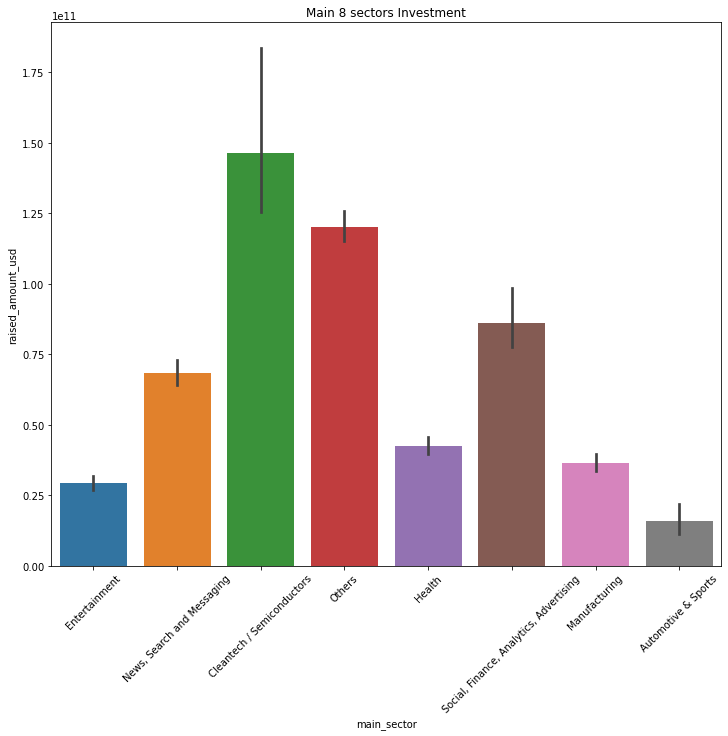

In [40]:
plt.figure(figsize = (12,10))
plt.title('Main 8 sectors Investment')
sns.barplot(x='main_sector', y="raised_amount_usd", data=sector_df, estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

In [41]:
sector_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,category
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment,media
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,Entertainment,media
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,Entertainment,media
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,media,Entertainment,media
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,media,Entertainment,media


### Checkpoint 5: Sector Analysis 2

In [42]:
eight_sectors= ['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 
                'Health', 'Manufacturing', 'News, Search and Messaging', 'Others',
               'Social, Finance, Analytics, Advertising'] 

In [43]:
usa_df=sector_df.loc[(sector_df['country_code']=='USA') & (sector_df['raised_amount_usd']>=5000000) & (sector_df['raised_amount_usd']<=15000000) & (sector_df['main_sector'].isin(eight_sectors))].reset_index(drop=True)
gbr_df=sector_df.loc[(sector_df['country_code']=='GBR') & (sector_df['raised_amount_usd']>=5000000) & (sector_df['raised_amount_usd']<=15000000) & (sector_df['main_sector'].isin(eight_sectors))].reset_index(drop=True)
ind_df=sector_df.loc[(sector_df['country_code']=='IND') & (sector_df['raised_amount_usd']>=5000000) & (sector_df['raised_amount_usd']<=15000000) & (sector_df['main_sector'].isin(eight_sectors))].reset_index(drop=True)

####  USA Analysis

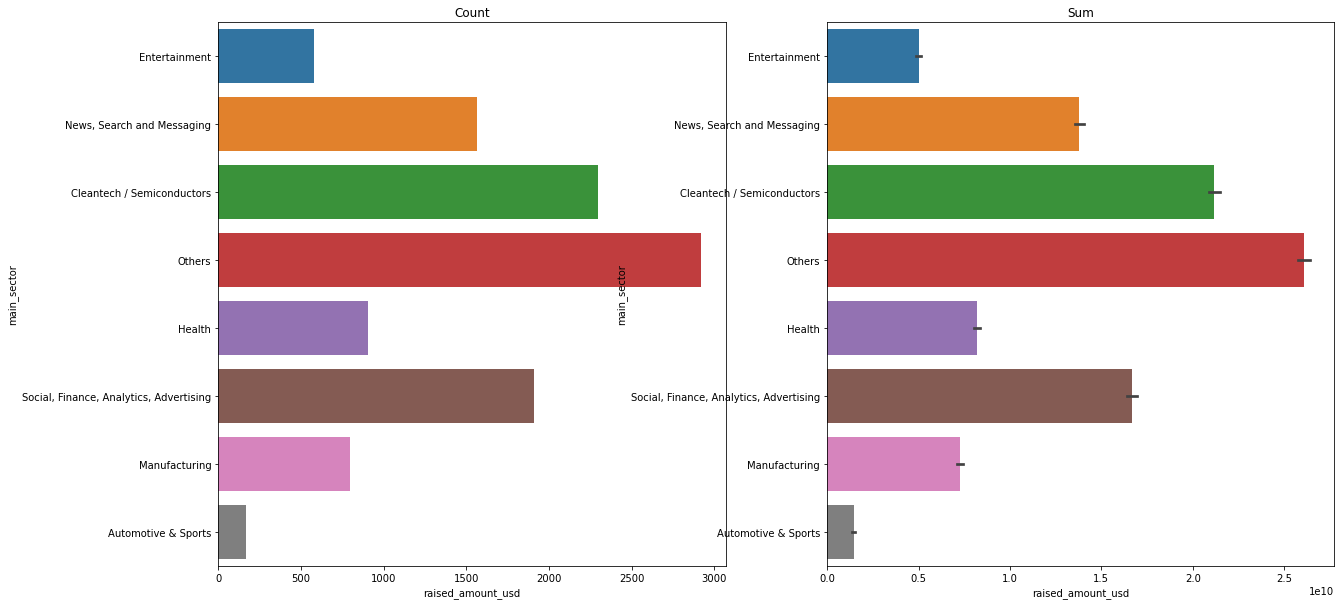

In [44]:
f,(ax1,ax2)=plt.subplots(1,2, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Count')
sns.barplot(x='raised_amount_usd', y="main_sector", data=usa_df, estimator=len)
plt.subplot(1, 2, 2)
plt.title('Sum')
sns.barplot(x='raised_amount_usd', y="main_sector", data=usa_df, estimator=np.sum)
plt.show()

In [45]:
usa_df.main_sector.value_counts().sum()

11149

In [46]:
usa_df.raised_amount_usd.sum()

99661524549.0

In [47]:
pd.DataFrame(usa_df.main_sector.value_counts())

,main_sector
Others,2923
Cleantech / Semiconductors,2297
"Social, Finance, Analytics, Advertising",1912
"News, Search and Messaging",1563
Health,908
Manufacturing,799
Entertainment,580
Automotive & Sports,167


In [48]:
usa_df[usa_df['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

#### GBR Analysis

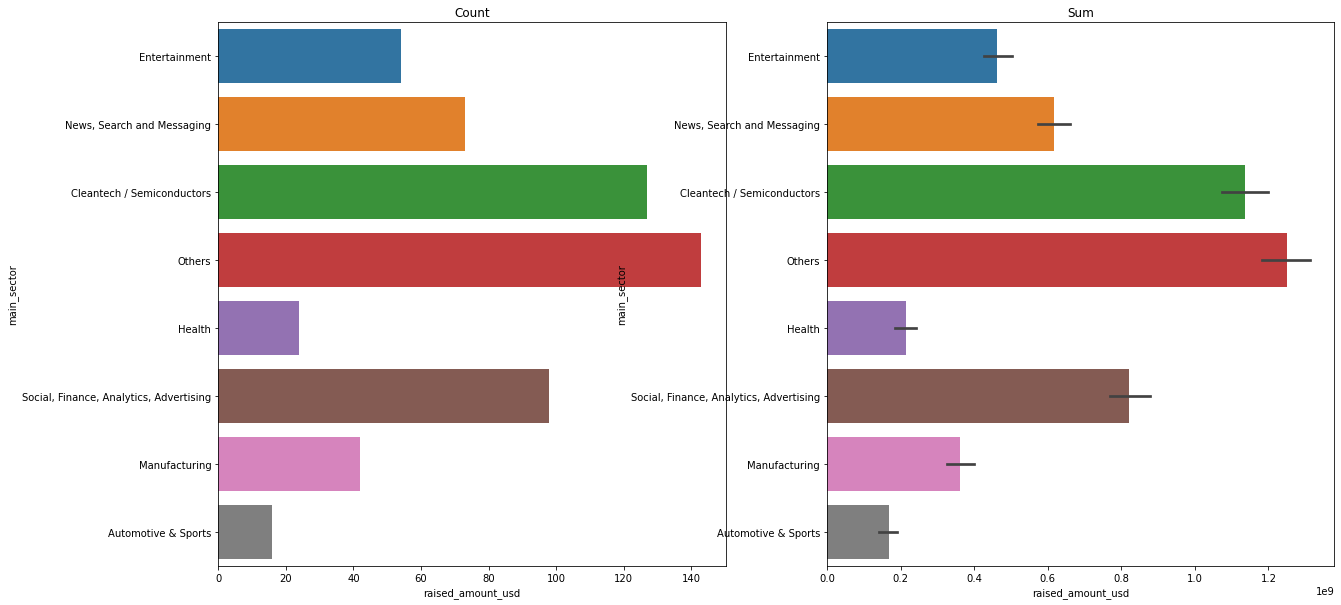

In [49]:
f,(ax1,ax2)=plt.subplots(1,2, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Count')
sns.barplot(x='raised_amount_usd', y="main_sector", data=gbr_df, estimator=len)
plt.subplot(1, 2, 2)
plt.title('Sum')
sns.barplot(x='raised_amount_usd', y="main_sector", data=gbr_df, estimator=np.sum)
plt.show()

In [50]:
gbr_df.main_sector.value_counts().sum()

577

In [51]:
gbr_df.raised_amount_usd.sum()

5028704358.0

In [52]:
pd.DataFrame(gbr_df.main_sector.value_counts())

,main_sector
Others,143
Cleantech / Semiconductors,127
"Social, Finance, Analytics, Advertising",98
"News, Search and Messaging",73
Entertainment,54
Manufacturing,42
Health,24
Automotive & Sports,16


In [53]:
gbr_df[gbr_df['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

####  IND Analysis

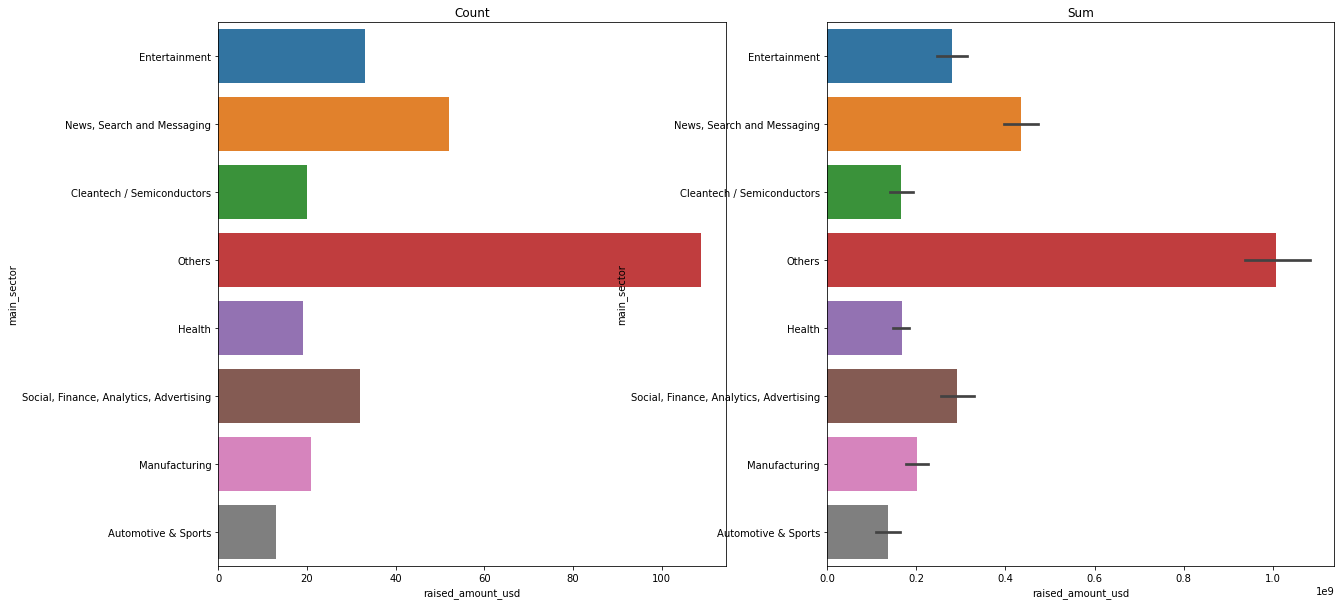

In [54]:
f,(ax1,ax2)=plt.subplots(1,2, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Count')
sns.barplot(x='raised_amount_usd', y="main_sector", data=ind_df, estimator=len)
plt.subplot(1, 2, 2)
plt.title('Sum')
sns.barplot(x='raised_amount_usd', y="main_sector", data=ind_df, estimator=np.sum)
plt.show()

In [55]:
ind_df.main_sector.value_counts().sum()

299

In [56]:
ind_df.raised_amount_usd.sum()

2683537552.0

In [57]:
pd.DataFrame(ind_df.main_sector.value_counts())

,main_sector
Others,109
"News, Search and Messaging",52
Entertainment,33
"Social, Finance, Analytics, Advertising",32
Manufacturing,21
Cleantech / Semiconductors,20
Health,19
Automotive & Sports,13


In [58]:
ind_df[ind_df['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/firstcry-com        39000000.0
/organization/myntra              38000000.0
/organization/commonfloor         32900000.0
/organization/pepperfry-com       28000000.0
/organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

### Checkpoint 6: Three plots 

A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

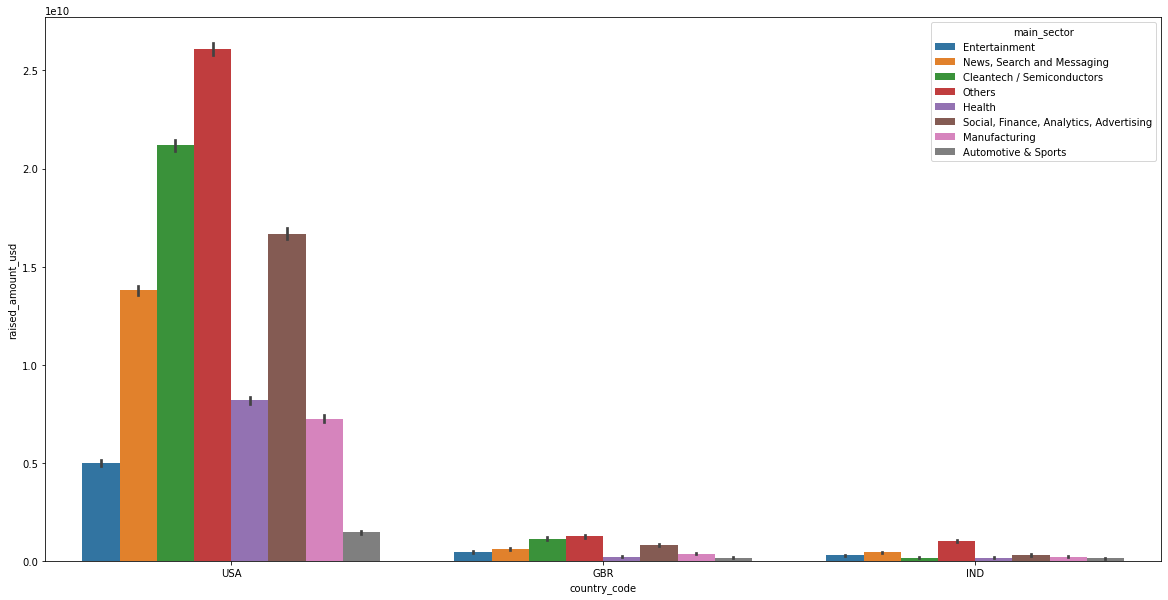

In [59]:
top3 = pd.concat([usa_df, gbr_df, ind_df])
plt.figure(figsize=(20, 10))
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=top3, estimator=np.sum)
plt.show()